In [69]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 100
import straxen
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import leastsq as ls
from matplotlib.colors import LogNorm
from tqdm import tqdm
st = straxen.contexts.strax_workshop_dali()
straxen.download_test_data()
st.select_runs()

Checking data availability: 100%|██████████| 5/5 [00:06<00:00,  1.05s/it]


,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,records_available,event_info_available,raw_records_available,peaks_available,events_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,True,True,True,True,True
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True


In [2]:
st.select_runs(include_tags='spe_topring')

,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,records_available,events_available,event_info_available,raw_records_available,peaks_available
31,2018-02-19 11:07:24+00:00,LED_3mus_stable,180219_1059,16986,LED_3mus_stable,2018-02-19 10:59:21+00:00,"spe_topring,_sciencerun2_candidate",193050.0,False,False,True,True,False


In [2]:
run_id='180219_1059'
df=st.get_array(run_id,'raw_records', seconds_range=(0,4))

run_id2='180219_0952'
df2=st.get_array(run_id2,'raw_records', seconds_range=(0,4))

Not saving raw_records while selecting a time range in the run


In [4]:
st.data_info('raw_records')

,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,int32,Integral in ADC x samples
5,pulse_length,int32,Length of pulse to which the record belongs (without zero-padding)
6,record_i,int16,Fragment number in the pulse
7,baseline,float32,Baseline in ADC counts. data = int(baseline) - data_orig
8,reduction_level,uint8,Level of data reduction applied (strax.ReductionLevel enum)
9,data,"('<i2', (110,))",Waveform data in ADC counts above baseline


In [150]:
def choose_channel(x,frame=df):
    #show all waveform data from channel x
    return frame[(frame['channel']==x)]

def show_wave(x,y,frame=df):
    #quite waveform checking tool
    wave=choose_channel(x,frame)['data'][y]
    plt.plot(wave)
    plt.xlabel('time[ns]')
    plt.ylabel('ADC counts')
    plt.title('channel '+str(x)+' waveform '+str(y))
    return plt.show()

def amp_distribution(x,frame=df):
    #pick out all maximum peaks for each waveform
    a=choose_channel(x,frame)['data']
    amp_data=[]
    for i in range(len(a)):
        amp_data.append(a[i].max())
    amp_data=np.array(amp_data)
    return amp_data

def gaus_fit(x_value,y_value,p0=[10,60,20]):

    def gaus(p,x):
        amp=p[0]
        mean=p[1]
        sig=p[2]
        return amp*e**(-(x-mean)**2/(2*sig**2))

    def gaus_res(p,x,y):
        return gaus(p,x)-y

    par,cor=ls(gaus_res,p0,args=(x_value,y_value))
    return par

def gaus_fit_all(x,frame=df):
    #perform gaussian fit for single photoelectron peak to locate the pulse window
    hist=np.histogram(amp_distribution(x,frame),100)
    hist2=np.delete(hist[1],-1)
    hist=np.array([hist[0],hist2])

    fit=gaus_fit(hist[1][(hist[1]>20)],hist[0][(hist[1]>20)])
    
    return fit

database=[] #fitted data for all channels
for i in tqdm(range(0,max(df['channel']+1))):
    try:
        database.append(gaus_fit_all(i))
    except: 
        database.append([1,1,1])
database=np.array(database)

def pulse_locator(x):
    #determine the window for each channel
    fit_para=database[x]
    range_max=fit_para[1]+fit_para[2]
    range_min=fit_para[1]-fit_para[2]
    amps=amp_distribution(x)
    single_electrons=np.where((amps>range_min) & (amps<range_max))
    return single_electrons

def pulse_map(x,frame=df):
    
    channel=x
    waves=choose_channel(x,frame)['data']
    pulses=pulse_locator(channel)
    wave_node=np.sum(waves[pulses],0)
    return wave_node

def LED_on(x,frame=df):
    a=choose_channel(x,frame)['data']
    peaks=[]
    for i in range(len(a)):
        peaks.append(a[i][150:180].max())
    peaks=np.array(peaks)
    return peaks

def noise_reduction(x):
    LED=np.histogram(LED_on(x,df),100,range=(0,142))
    noise=np.histogram(LED_on(x,df2),100,range=(0,142))
    
    normalization=np.sum(noise[0][2:14])/np.sum(LED[0][2:14])
    noise=noise[0]/normalization
    
    noise_reduced=LED[0]-noise
    for i in range(len(noise_reduced)):
        if noise_reduced[i]<0:
            noise_reduced[i]=0
    return noise_reduced

def reduced_fraction(x):
    distribution=noise_reduction(x)
    total=np.sum(distribution)
    fraction=[]
    for i in range(len(distribution)):
        fraction.append(1-np.sum(distribution[0:i])/total)
    fraction=np.array(fraction)*100.0
    return fraction

 12%|█▏        | 31/254 [00:00<00:03, 71.26it/s]/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
100%|██████████| 254/254 [00:03<00:00, 73.33it/s]


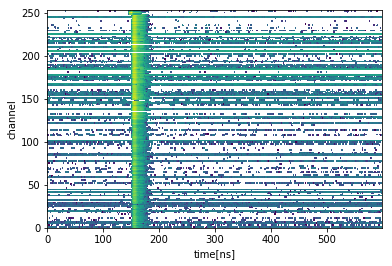

In [151]:
channel=np.arange(0,max(df['channel']+1),1)
time_step=np.arange(0,600,1)
waves=[]
for i in channel:
    waves.append(pulse_map(i))

waves=np.array(waves).T
channel,time_step=np.meshgrid(channel,time_step)

from matplotlib.colors import LogNorm
plt.pcolormesh(time_step,channel,waves,norm=LogNorm())
plt.ylabel('channel')
plt.xlabel('time[ns]')
plt.show()

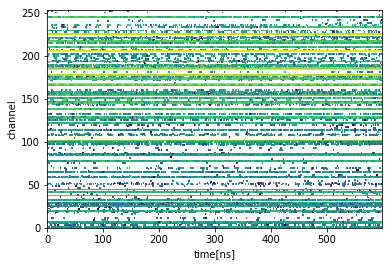

In [152]:
channel2=np.arange(0,max(df2['channel']+1),1)
time_step2=np.arange(0,600,1)
waves2=[]
for i in channel2:
    waves2.append(pulse_map(i,df2))

waves2=np.array(waves2).T
channel2,time_step2=np.meshgrid(channel2,time_step2)

plt.pcolormesh(time_step2,channel2,waves2,norm=LogNorm())
plt.ylabel('channel')
plt.xlabel('time[ns]')
plt.show()

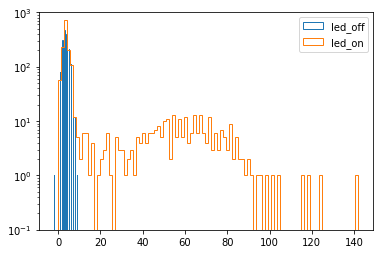

In [153]:
num=0
plt.hist(LED_on(num,df2),100,histtype='step')
plt.hist(LED_on(num,df),100,histtype='step')
plt.legend(('led_off',"led_on"))
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.show()

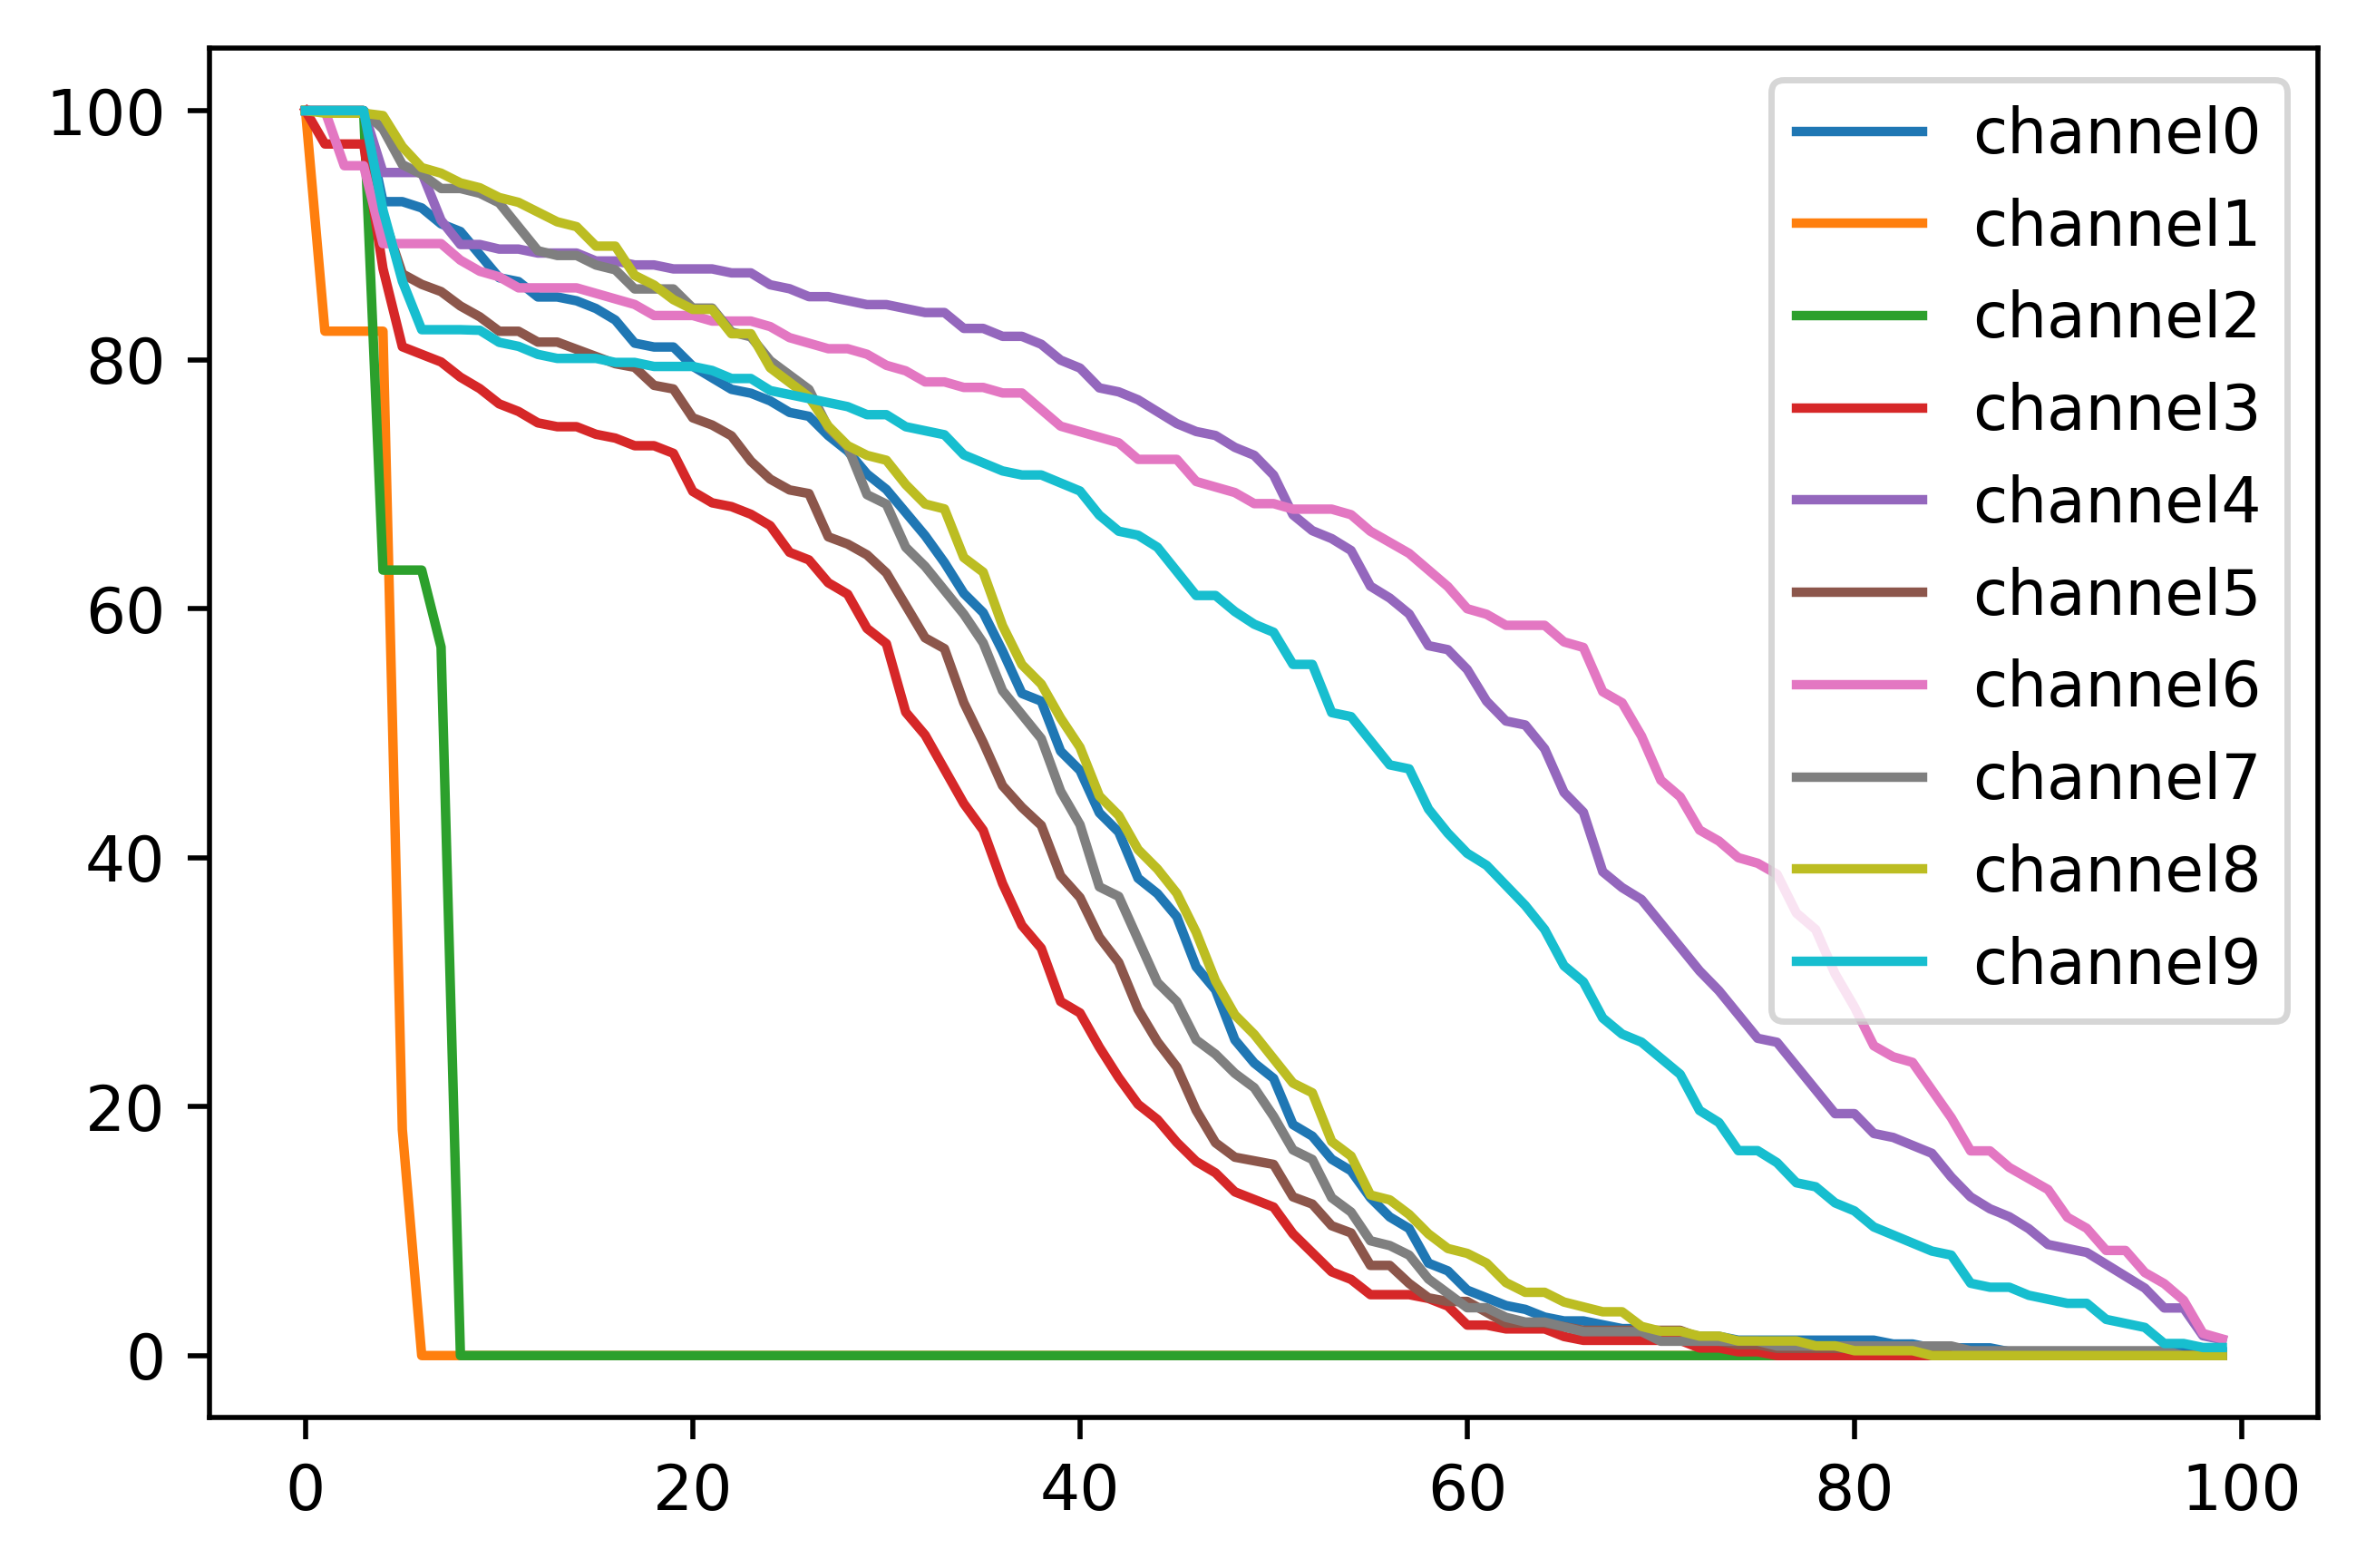

In [155]:
fig,ax=plt.subplots(dpi=500)
for i in range(0,10):
    ax.plot(reduced_fraction(i),label='channel'+str(i))
ax.legend(loc='best')
plt.show()